In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
deliveries=pd.read_csv('deliveries.csv')
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

#batsman analysis

In [ ]:
#Top 10 run scorers
run_scorer = deliveries.groupby("batter")["batsman_runs"].sum()
run_scorer

,batsman_runs
batter,
A Ashish Reddy,280
A Badoni,634
A Chandila,4
A Chopra,53
A Choudhary,25
...,...
Yashpal Singh,47
Younis Khan,3
Yudhvir Singh,22


<ipython-input-3-a6c96d8db3b9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(run_scorer.sort_values(ascending=False).head(10),palette="Blues_d")


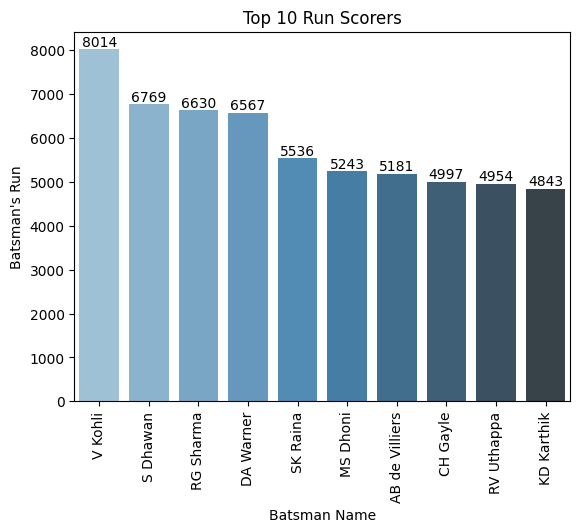

In [ ]:
ax=sns.barplot(run_scorer.sort_values(ascending=False).head(10),palette="Blues_d")
for i in ax.containers:
    ax.bar_label(i)

plt.ylabel("Batsman's Run")
plt.xlabel("Batsman Name")
plt.title("Top 10 Run Scorers")
plt.xticks(rotation=90)
plt.show()

In [ ]:
#best strike rate (Minimum 200 balls faced)
ballface=deliveries.groupby("batter")["ball"].count()
ballface

strikerate=run_scorer/ballface
strikerate

,0
batter,
A Ashish Reddy,1.428571
A Badoni,1.255446
A Chandila,0.571429
A Chopra,0.706667
A Choudhary,1.250000
...,...
Yashpal Singh,0.701493
Younis Khan,0.428571
Yudhvir Singh,1.375000


<ipython-input-5-fdf23aa326f7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(strikerate.sort_values(ascending=False).head(10).round(3),palette="Blues_d")


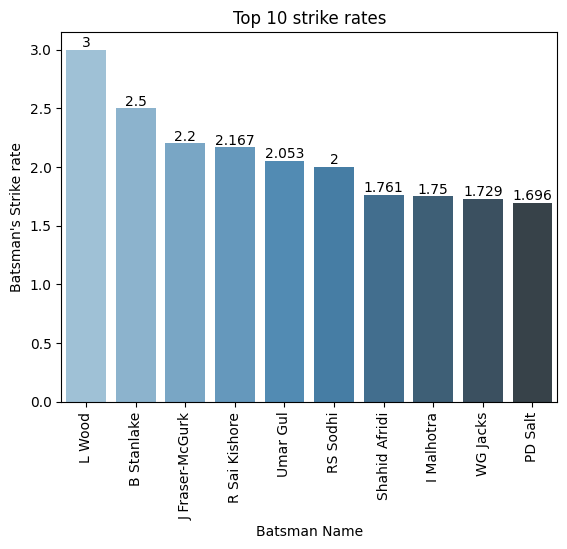

In [ ]:
ax=sns.barplot(strikerate.sort_values(ascending=False).head(10).round(3),palette="Blues_d")
for i in ax.containers:
    ax.bar_label(i)

plt.ylabel("Batsman's Strike rate")
plt.xlabel("Batsman Name")
plt.title("Top 10 strike rates")
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Mo st 4s and 6s by a batsman
fours_df= deliveries[deliveries['batsman_runs'] == 4]
fours = fours_df.groupby('batter').size()
four_most=fours.sort_values(ascending=False).head(10)
sixes_df = deliveries[deliveries['batsman_runs'] == 6]

sixes = sixes_df.groupby('batter').size()
six_most=sixes.sort_values(ascending=False).head(10)


<ipython-input-7-773672ad7720>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=four_most,y=four_most.index,palette="Blues_d")


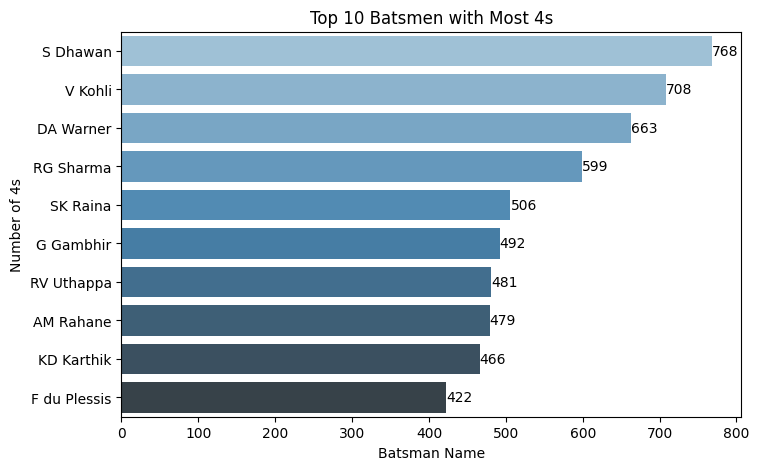

In [ ]:
plt.figure(figsize=(8,5))
ax=sns.barplot(x=four_most,y=four_most.index,palette="Blues_d")
for i in ax.containers:
  ax.bar_label(i)

plt.ylabel("Number of 4s")
plt.xlabel("Batsman Name")
plt.title("Top 10 Batsmen with Most 4s")
plt.show()

<ipython-input-8-9a8819ec6eb6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=six_most,y=six_most.index,palette="Blues_d")


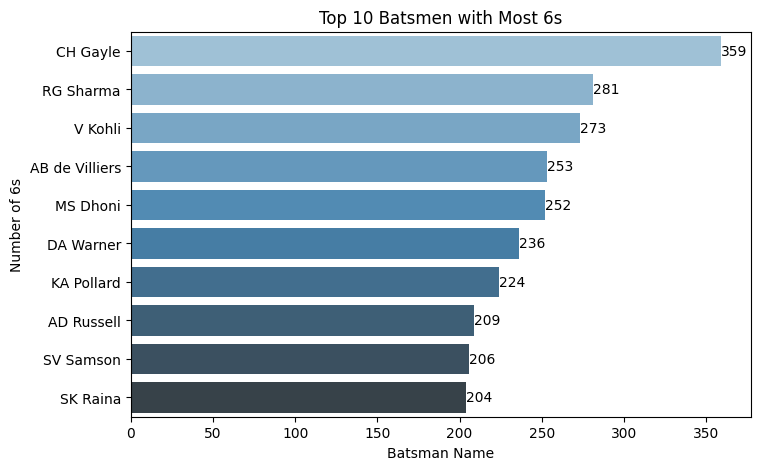

In [ ]:
plt.figure(figsize=(8,5))
ax=sns.barplot(x=six_most,y=six_most.index,palette="Blues_d")
for i in ax.containers:
  ax.bar_label(i)

plt.ylabel("Number of 6s")
plt.xlabel("Batsman Name")
plt.title("Top 10 Batsmen with Most 6s")
plt.show()

# Bowler Analysis


In [ ]:
#Top wicket takers

bowler=deliveries.groupby("bowler")["is_wicket"].count()
bowler

,is_wicket
bowler,
A Ashish Reddy,270
A Badoni,25
A Chandila,234
A Choudhary,108
A Dananjaya,25
...,...
Yash Dayal,615
Yash Thakur,432
Yudhvir Singh,74


<ipython-input-10-7a73ff696348>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(y=bowler.sort_values(ascending=False).head(10),x=bowler.sort_values(ascending=False).head(10).index,palette="Blues_d")


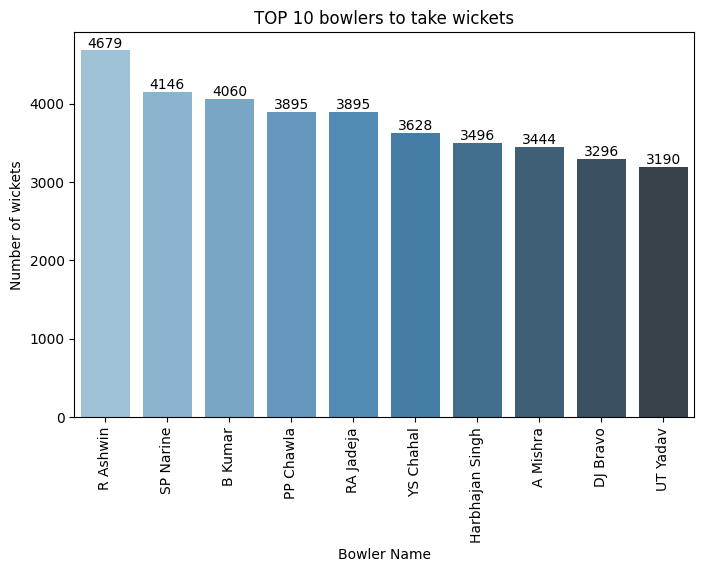

In [ ]:
plt.figure(figsize=(8,5))

ax=sns.barplot(y=bowler.sort_values(ascending=False).head(10),x=bowler.sort_values(ascending=False).head(10).index,palette="Blues_d")
for i in ax.containers:
  ax.bar_label(i)

plt.ylabel("Number of wickets")
plt.xlabel("Bowler Name")
plt.xticks(rotation=90)
plt.title("TOP 10 bowlers to take wickets")
plt.show()

In [ ]:
#Most dot balls
dotball_df=deliveries[deliveries["batsman_runs"]==0]
dotball=dotball_df.groupby("bowler")["batsman_runs"].count()
dotball

,batsman_runs
bowler,
A Ashish Reddy,89
A Badoni,6
A Chandila,105
A Choudhary,49
A Dananjaya,7
...,...
Yash Dayal,257
Yash Thakur,164
Yudhvir Singh,32


<ipython-input-12-d42bdefe0156>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(y=dotball.sort_values(ascending=False).head(10),x=dotball.sort_values(ascending=False).head(10).index,palette="Blues_d")


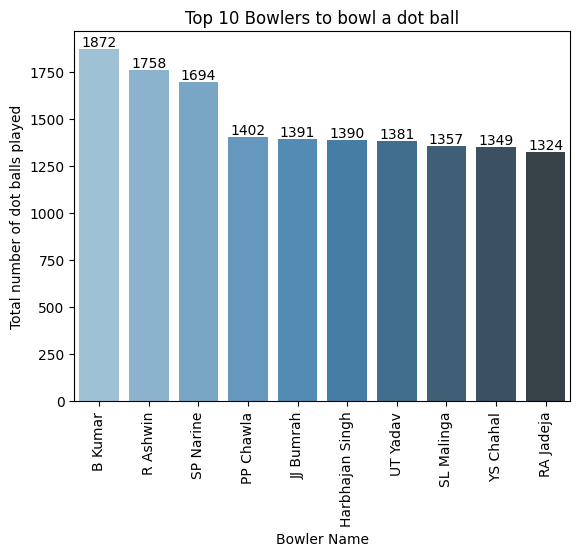

In [ ]:
ax=sns.barplot(y=dotball.sort_values(ascending=False).head(10),x=dotball.sort_values(ascending=False).head(10).index,palette="Blues_d")
for i in ax.containers:
  ax.bar_label(i)

plt.ylabel("Total number of dot balls played")
plt.xlabel("Bowler Name")
plt.xticks(rotation=90)
plt.title("Top 10 Bowlers to bowl a dot ball")
plt.show()

In [ ]:
#wicket by dismissal
dismissal=deliveries.groupby("dismissal_kind")["is_wicket"].count()
dismissal

,is_wicket
dismissal_kind,
bowled,2212
caught,8063
caught and bowled,367
hit wicket,15
lbw,800
obstructing the field,3
retired hurt,15
retired out,3
run out,1114


# Team Performance

Top 10 Highest Team Totals in a Single Innings:
inning  batting_team               
1       Mumbai Indians                 22340
        Chennai Super Kings            22092
        Royal Challengers Bangalore    20178
2       Mumbai Indians                 19793
1       Kolkata Knight Riders          19713
2       Kolkata Knight Riders          19582
        Rajasthan Royals               17852
        Royal Challengers Bangalore    17473
1       Rajasthan Royals               16860
2       Chennai Super Kings            16528
Name: total_runs, dtype: int64


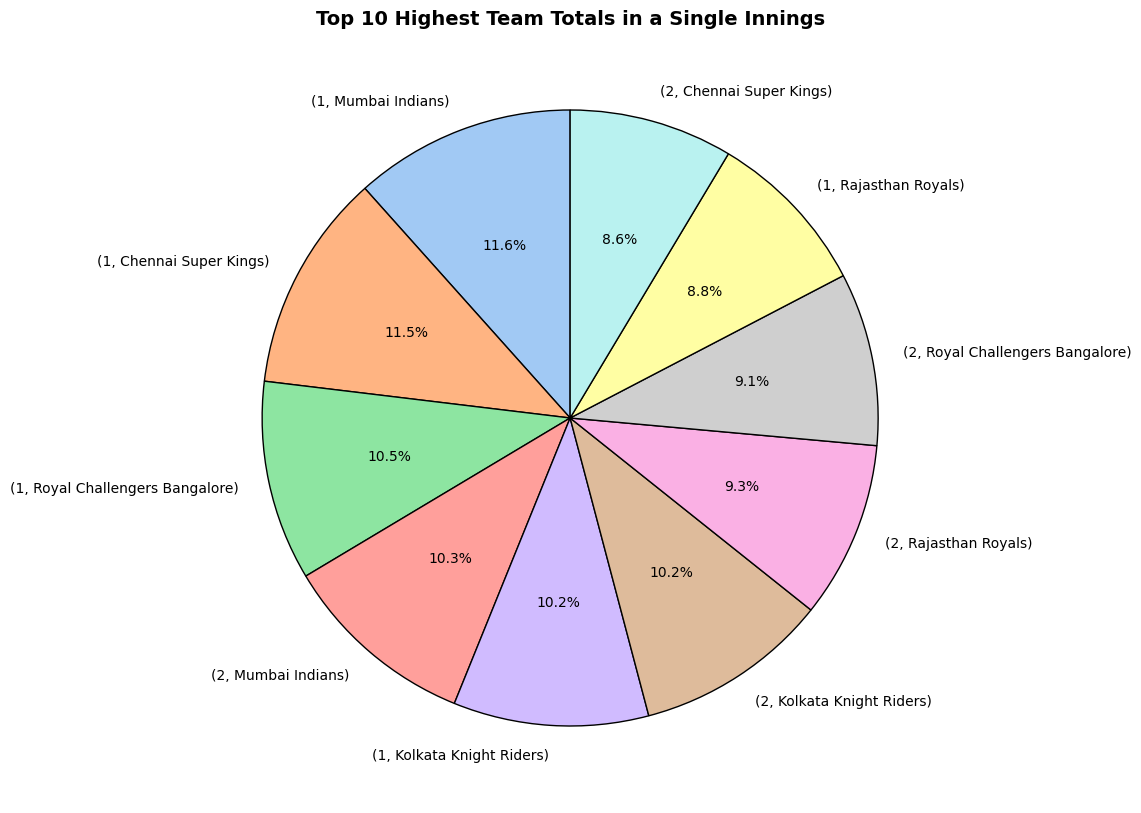

In [ ]:
#Most run scored by a team in a single innings
team_runs = deliveries.groupby(['inning', 'batting_team'])['total_runs'].sum()
most_runs_inning = team_runs.sort_values(ascending=False).head(10)
print("Top 10 Highest Team Totals in a Single Innings:")
print(most_runs_inning)
plt.figure(figsize=(10, 10))
most_runs_inning.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), wedgeprops={'edgecolor': 'black', 'linewidth': 1})
plt.title("Top 10 Highest Team Totals in a Single Innings", fontsize=14, fontweight='bold')
plt.ylabel('')
plt.show()

Sixes scored by each team batting_team
Chennai Super Kings            1509
Deccan Chargers                 400
Delhi Capitals                  550
Delhi Daredevils                801
Gujarat Lions                   155
Gujarat Titans                  271
Kings XI Punjab                1075
Kochi Tuskers Kerala             53
Kolkata Knight Riders          1495
Lucknow Super Giants            332
Mumbai Indians                 1685
Pune Warriors                   196
Punjab Kings                    440
Rajasthan Royals               1237
Rising Pune Supergiant           89
Rising Pune Supergiants          68
Royal Challengers Bangalore    1488
Royal Challengers Bengaluru     165
Sunrisers Hyderabad            1042
Name: batsman_runs, dtype: int64


<ipython-input-22-4b7c647e56e9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(y=sixes_team,x=sixes_team.index,palette="Blues_d")


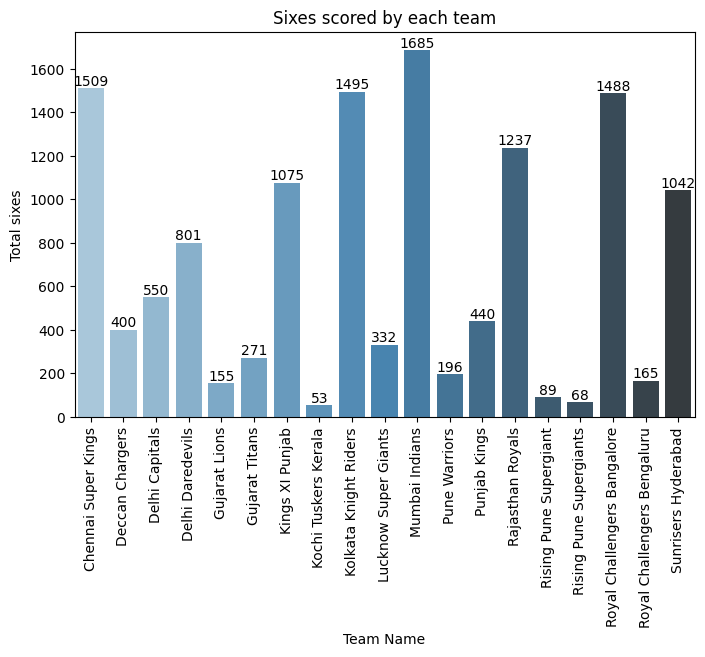

In [ ]:
# most sixes by a team
sixes_team_df = deliveries[deliveries["batsman_runs"]==6]
sixes_team=sixes_team_df.groupby("batting_team")["batsman_runs"].count()
print("Sixes scored by each team", sixes_team)

plt.figure(figsize=(8,5))

ax=sns.barplot(y=sixes_team,x=sixes_team.index,palette="Blues_d")
for i in ax.containers:
  ax.bar_label(i)

plt.ylabel("Total sixes")
plt.xlabel("Team Name")
plt.xticks(rotation=90)
plt.title("Sixes scored by each team")
plt.show()

Dismissals by team after consolidation:
bowling_team
Chennai Super Kings            28576
Delhi Daredevils               29941
Gujarat Lions                   8846
Kings XI Punjab                29202
Kochi Tuskers Kerala            1614
Kolkata Knight Riders          29663
Lucknow Super Giants            5226
Mumbai Indians                 31505
Rajasthan Royals               26432
Rising Pune Supergiants         9000
Royal Challengers Bangalore    30159
Sunrisers Hyderabad            30756
Name: is_wicket, dtype: int64


<ipython-input-16-7636ec1d1e58>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=dismissal_team.sort_values(ascending=False), x=dismissal_team.sort_values(ascending=False).index, palette="magma") # Create a bar plot using seaborn with a different palette


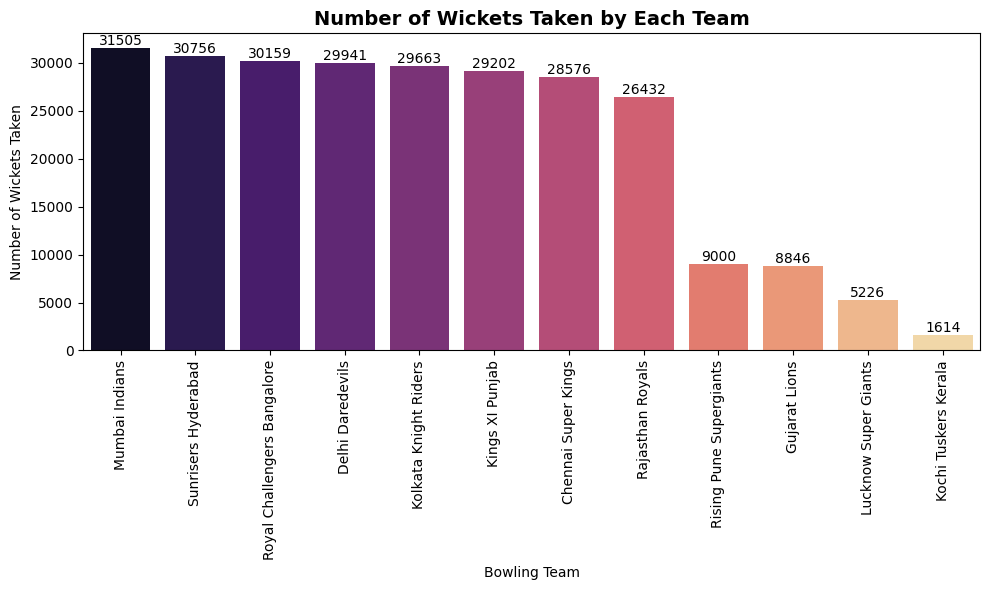

In [ ]:
#Dismissals by teams: number of wickets taken by each team.
dismissal_team=deliveries.groupby("bowling_team")["is_wicket"].count()
dismissal_team

if "Royal Challengers Bengaluru" in dismissal_team.index:
    # Add the count for the old name to the new name (or vice-versa, depends on preferred final name)
    # Assuming 'Royal Challengers Bangalore' is the preferred name in the final output
    dismissal_team["Royal Challengers Bangalore"] = dismissal_team.get("Royal Challengers Bangalore", 0) + dismissal_team.get("Royal Challengers Bengaluru", 0)
    dismissal_team.drop("Royal Challengers Bengaluru", inplace=True)

if "Delhi Capitals" in dismissal_team.index:
    # Assuming 'Delhi Daredevils' is the preferred name
    dismissal_team["Delhi Daredevils"] = dismissal_team.get("Delhi Daredevils", 0) + dismissal_team.get("Delhi Capitals", 0)
    dismissal_team.drop("Delhi Capitals", inplace=True)

if "Punjab Kings" in dismissal_team.index:
    # Assuming 'Kings XI Punjab' is the preferred name
    dismissal_team["Kings XI Punjab"] = dismissal_team.get("Kings XI Punjab", 0) + dismissal_team.get("Punjab Kings", 0)
    dismissal_team.drop("Punjab Kings", inplace=True)

if "Deccan Chargers" in dismissal_team.index:
    # Assuming 'Sunrisers Hyderabad' is the preferred name
    dismissal_team["Sunrisers Hyderabad"] = dismissal_team.get("Sunrisers Hyderabad", 0) + dismissal_team.get("Deccan Chargers", 0)
    dismissal_team.drop("Deccan Chargers", inplace=True)

# This case involves three team names. Combine all three into one.
# Assuming 'Rising Pune Supergiants' is the preferred name for both Pune teams.
if "Rising Pune Supergiant" in dismissal_team.index or "Pune Warriors" in dismissal_team.index:
    dismissal_team["Rising Pune Supergiants"] = dismissal_team.get("Rising Pune Supergiants", 0) + dismissal_team.get("Rising Pune Supergiant", 0) + dismissal_team.get("Pune Warriors", 0)
    if "Rising Pune Supergiant" in dismissal_team.index:
        dismissal_team.drop("Rising Pune Supergiant", inplace=True)
    if "Pune Warriors" in dismissal_team.index:
        dismissal_team.drop("Pune Warriors", inplace=True)

# This case involves two team names.
# Assuming 'Gujarat Lions' is the preferred name.
if "Gujarat Titans" in dismissal_team.index:
     dismissal_team["Gujarat Lions"] = dismissal_team.get("Gujarat Lions", 0) + dismissal_team.get("Gujarat Titans", 0)
     dismissal_team.drop("Gujarat Titans", inplace=True)


print("Dismissals by team after consolidation:") # Add a print statement to see the result of consolidation
print(dismissal_team) # Print the consolidated dismissal_team Series

plt.figure(figsize=(10, 6)) # Set the figure size for better readability
ax = sns.barplot(y=dismissal_team.sort_values(ascending=False), x=dismissal_team.sort_values(ascending=False).index, palette="magma") # Create a bar plot using seaborn with a different palette
for i in ax.containers:
    ax.bar_label(i)
plt.ylabel("Number of Wickets Taken")
plt.xlabel("Bowling Team")
plt.xticks(rotation=90)
plt.title("Number of Wickets Taken by Each Team", fontsize=14, fontweight='bold') # Set the title of the plot
plt.tight_layout()
plt.show()

# Overwise analysis

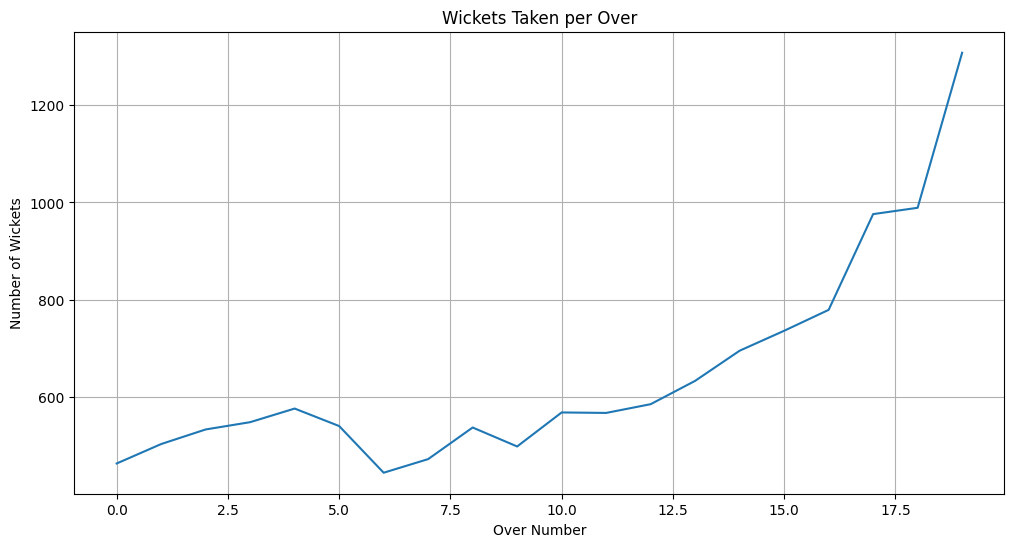

In [ ]:
#wickets per over
dismissals = deliveries[deliveries["player_dismissed"].notna()]

wickets_per_over = dismissals.groupby("over")["player_dismissed"].count()

wickets_per_over

plt.figure(figsize=(12, 6))
sns.lineplot(x=wickets_per_over.index, y=wickets_per_over.values)
plt.xlabel("Over Number")
plt.ylabel("Number of Wickets")
plt.title("Wickets Taken per Over")
plt.grid(True) # Add a grid for better readability
plt.show()

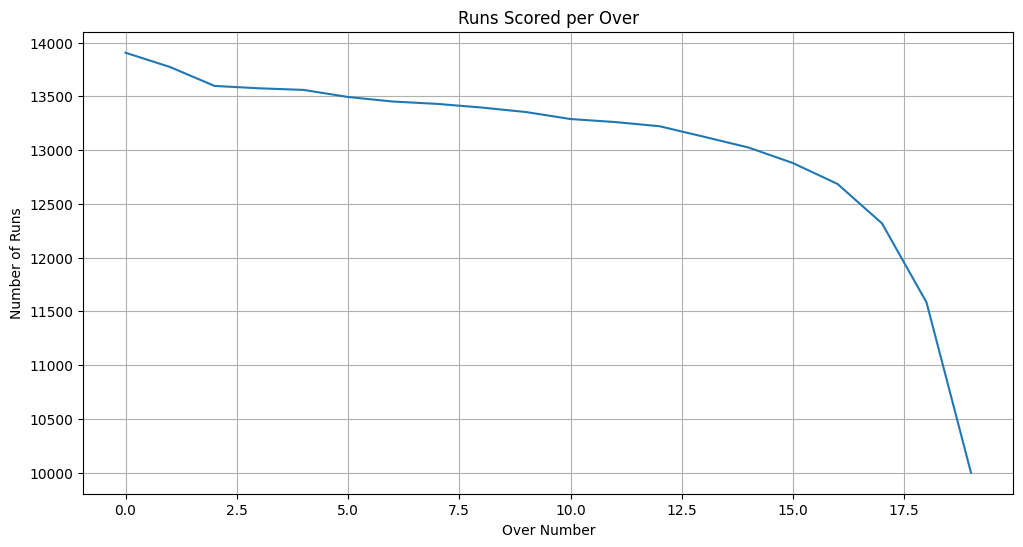

In [ ]:
runs_per_over = deliveries.groupby("over")["total_runs"].count()
plt.figure(figsize=(12, 6))
sns.lineplot(x=runs_per_over.index, y=runs_per_over.values)
plt.xlabel("Over Number")
plt.ylabel("Number of Runs")
plt.title("Runs Scored per Over")
plt.grid(True) # Add a grid for better readability
plt.show()

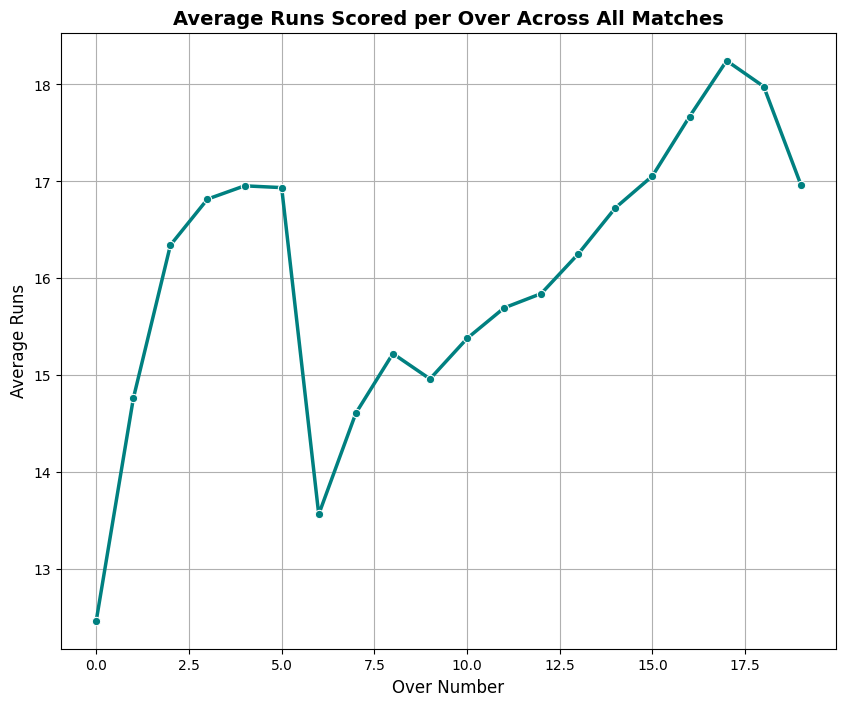

In [ ]:
# Total runs per match per over
runs_by_match_over = deliveries.groupby(["match_id", "over"])["total_runs"].sum().reset_index()
avg_runs_per_over = runs_by_match_over.groupby("over")["total_runs"].mean()

plt.figure(figsize=(10, 8))
sns.lineplot(x=avg_runs_per_over.index, y=avg_runs_per_over.values, marker='o', color='teal', linewidth=2.5) # Add markers, change color, increase line width
plt.xlabel("Over Number", fontsize=12)
plt.ylabel("Average Runs", fontsize=12)
plt.title("Average Runs Scored per Over Across All Matches", fontsize=14, fontweight='bold')
plt.grid(True)

#Match V/S Innings

In [ ]:
# Group by match and inning to get total runs
innings_scores = deliveries.groupby(["match_id", "inning"])["total_runs"].sum().reset_index()

# Average score in 1st and 2nd innings
avg_innings_score = innings_scores.groupby("inning")["total_runs"].mean()

print("Average Runs per Innings:")
print(avg_innings_score)

Average Runs per Innings:
inning
1    165.547032
2    152.194139
3      9.785714
4      8.785714
5     11.000000
6     15.000000
Name: total_runs, dtype: float64


<ipython-input-21-1978994f89d2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='inning', y='total_runs', data=avg_innings_score_df, palette="viridis")


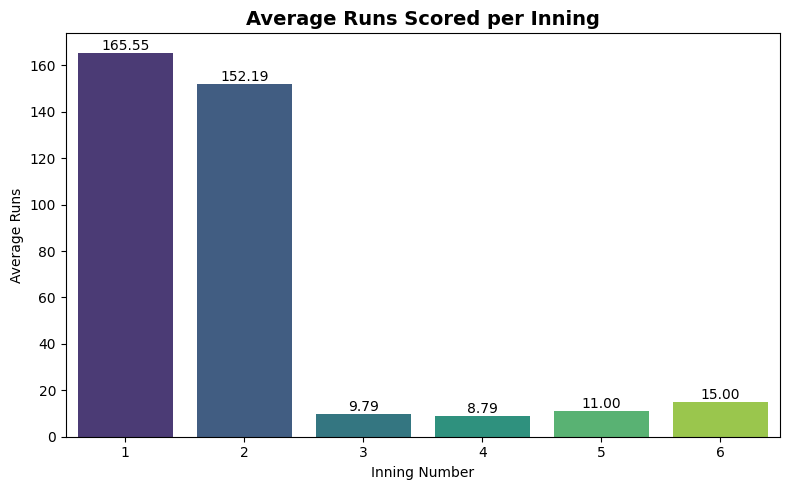

In [ ]:
plt.figure(figsize=(8, 5)) # Set the figure size

# Create a bar plot using seaborn
# We need to reset the index to make 'inning' a column for seaborn
avg_innings_score_df = avg_innings_score.reset_index()
ax = sns.barplot(x='inning', y='total_runs', data=avg_innings_score_df, palette="viridis")

# Add labels to the bars
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f') # Format the labels to 2 decimal places

plt.ylabel("Average Runs") # Set the y-axis label
plt.xlabel("Inning Number") # Set the x-axis label
plt.title("Average Runs Scored per Inning", fontsize=14, fontweight='bold') # Set the title
plt.xticks(rotation=0) # Keep x-axis labels horizontal
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show() # Display the plot